[nltk_data] Downloading package brown to /Users/vaji/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vaji/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vaji/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


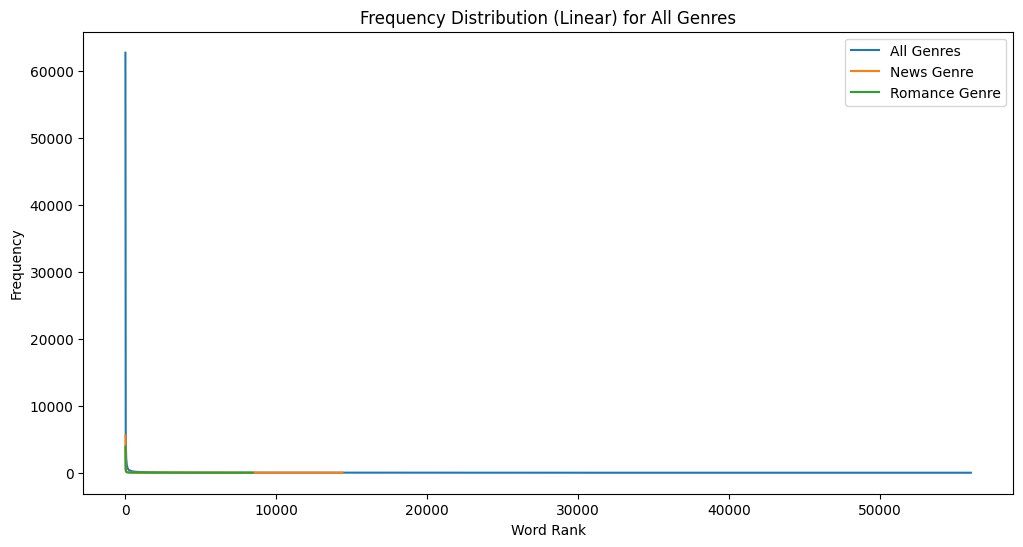

KeyboardInterrupt: 

In [1]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import brown
from nltk.probability import FreqDist
from nltk import pos_tag, word_tokenize

# Ensureing that the Brown corpus is available in NLTK
nltk.download('brown')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Import the Brown corpus for all words and specific genres(which here is news and romance)
brown_words = brown.words()
news_words = brown.words(categories='news')
romance_words = brown.words(categories='romance')

# Compute frequency distributions
fdist_all = FreqDist(brown_words)
fdist_news = FreqDist(news_words)
fdist_romance = FreqDist(romance_words)

# Extract tokens, types, words, average words per sentence, average word length for all words
tokens = len(brown_words)
types = len(fdist_all)
words = sum(fdist_all.values())
sents = len(brown.sents())
average_words_per_sentence = words / sents
average_word_length = sum(len(word) for word in brown_words) / words

# POS tagging and find the 10 most common tags
pos_tags = [tag for (word, tag) in pos_tag(brown_words)]
pos_freq = FreqDist(pos_tags)
common_pos_tags = pos_freq.most_common(10)

# Frequency lists for plotting
freq_list_all = [freq for (word, freq) in fdist_all.most_common()]
freq_list_news = [freq for (word, freq) in fdist_news.most_common()]
freq_list_romance = [freq for (word, freq) in fdist_romance.most_common()]

# Generate combined plots for all words, news, and romance
plt.figure(figsize=(12, 6))

# Linear plot for all genres
plt.plot(freq_list_all, label='All Genres')
plt.plot(freq_list_news, label='News Genre')
plt.plot(freq_list_romance, label='Romance Genre')
plt.title('Frequency Distribution (Linear) for All Genres')
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Log-log plot for all genres
plt.figure(figsize=(12, 6))
plt.loglog(freq_list_all, label='All Genres')
plt.loglog(freq_list_news, label='News Genre')
plt.loglog(freq_list_romance, label='Romance Genre')
plt.title('Frequency Distribution (Log-Log) for All Genres')
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Information for written report
info = {
    'number_of_tokens': tokens,
    'number_of_types': types,
    'number_of_words': words,
    'average_words_per_sentence': average_words_per_sentence,
    'average_word_length': average_word_length,
    'ten_most_frequent_POS_tags': common_pos_tags
}

print(info)